# CAPSTONE 1 PROJECT: ỨNG DỤNG CÁC THUẬT TOÁN HỒI QUY ĐỂ DỰ ĐOÁN THỜI GIAN GIAO HÀNG VÀ THUẬT TOÁN K-MEANS ĐỂ PHÂN CỤM TÀI XẾ TRONG DỊCH VỤ GIAO ĐỒ ĂN


Thời gian giao hàng ảnh hưởng trực tiếp đến sự hài lòng của khách hàng và trải nghiệm tổng thể của họ. Bên cạnh đó, đội ngũ tài xế - vốn là mắt xích quan trọng trong chuỗi cung ứng - thường rất đa dạng về kinh nghiệm, thái độ làm việc và năng lực chuyển môn. Vì vậy, chúng em đã phát triển mô hình dự đoán bằng cách sử dụng các thuật toán hồi quy như hồi quy tuyến tính, Decision Tree Regressor và Random Forest Regressor. Sử dụng các chỉ số đánh giá như sai số bình phương trung bình (MSE) và điểm R-squared (R2)  để đo lường độ chính xác. Và kết hợp thêm mô hình K-Means để thực hiện phân cụm tài xế có đặc điểm tương đồng với nhau và đánh giá kết quả bằng chỉ số silhouette score nhằm giúp doanh nghiệp có thể đưa ra các chính sách đào tạo cũng như phân bổ nguồn lực hiệu quả.

Bộ dữ liệu "Food Delivery Dataset" thuộc lĩnh vực Logistics và Dịch vụ giao đồ ăn, tập trung vào việc phân tích và dự đoán thời gian giao hàng dựa trên nhiều yếu tố ảnh hưởng.
Dữ liệu gồm 20 cột và 45.597 dòng, bao gồm thông tin về tài xế giao hàng (tuổi, đánh giá, phương tiện), đặc điểm đơn hàng (loại thực phẩm, số lượng đơn giao cùng lúc), điều kiện môi trường (mật độ giao thông, thời tiết, loại thành phố) và thông tin địa lý (tọa độ nhà hàng và điểm giao hàng).


## **I. IMPORT DATA**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

In [2]:
df= pd.read_csv('Food Delivery Dataset.csv')
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [3]:
df.describe().T

count       mean        std        min  \
Restaurant_latitude          45593.0  17.017729   8.185109 -30.905562   
Restaurant_longitude         45593.0  70.231332  22.883647 -88.366217   
Delivery_location_latitude   45593.0  17.465186   7.335122   0.010000   
Delivery_location_longitude  45593.0  70.845702  21.118812   0.010000   
Vehicle_condition            45593.0   1.023359   0.839065   0.000000   

                                   25%        50%        75%        max  
Restaurant_latitude          12.933284  18.546947  22.728163  30.914057  
Restaurant_longitude         73.170000  75.898497  78.044095  88.433452  
Delivery_location_latitude   12.988453  18.633934  22.785049  31.054057  
Delivery_location_longitude  73.280000  76.002574  78.107044  88.563452  
Vehicle_condition             0.000000   1.000000   2.000000   3.000000

In [4]:
df.describe(exclude=np.number).T

count unique              top   freq
ID                       45593  45593          0x4607       1
Delivery_person_ID       45593   1320  PUNERES01DEL01      67
Delivery_person_Age      45593     23               35   2262
Delivery_person_Ratings  45593     29              4.8   7148
Order_Date               45593     44       15-03-2022   1192
Time_Orderd              45593    177             NaN    1731
Time_Order_picked        45593    193         21:30:00    496
Weatherconditions        45593      7   conditions Fog   7654
Road_traffic_density     45593      5             Low   15477
Type_of_order            45593      4           Snack   11533
Type_of_vehicle          45593      4      motorcycle   26435
multiple_deliveries      45593      5                1  28159
Festival                 45593      3              No   44469
City                     45593      4   Metropolitian   34093
Time_taken(min)          45593     45         (min) 26   2123

In [5]:
cols = ['Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density',
                    'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']

for col in cols:
    unique_values = df[col].unique()
    print(f"'{col}':\n", unique_values, "\n")


'Delivery_person_Ratings':
 ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3'] 

'Weatherconditions':
 ['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN'] 

'Road_traffic_density':
 ['High ' 'Jam ' 'Low ' 'Medium ' 'NaN '] 

'Type_of_order':
 ['Snack ' 'Drinks ' 'Buffet ' 'Meal '] 

'Type_of_vehicle':
 ['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle '] 

'multiple_deliveries':
 ['0' '1' '3' 'NaN ' '2'] 

'Festival':
 ['No ' 'Yes ' 'NaN '] 

'City':
 ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'NaN '] 



## **II. DATA PREPROCESSING**

### **Data Cleaning**

In [6]:
#kiểm tra dữ liệu trước khi làm sạch
df

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                        75.912471  19-03-2022    11:30:00          11:45:00   
1                        77.813237  25-03-2022    19:45:00          19:50:00   
2                        77.688400  19-03-2022    08:30:00          08:45:00   
3                        77.026494  05-04-2022    18:00:00          18:10:00   
4                        80.289982  26-03-2022    13:30:00          13:45:00   
...                            ...         ...         ...               ...   
45588                    75.804257  24-03-2022    11:35:00          11:45:00   
45589                     0.070000  16-02-2022    19:55:00          20:10:00   
45590                    80.272439  11-03-2022    23:50:00          00:05:00   
45591                    77.026241  07-03-2022    13:35:00          13:40:00   
45592                    85.405731  02-03-2022    17:10:00          17:15:00   

           Weatherconditions Road_traffic_density  Vehicle_condition  \
0           conditions Sunny                High                   2   
1          conditions Stormy                 Jam                   2   
2      conditions Sandstorms                 Low                   0   
3           conditions Sunny              Medium                   0   
4          conditions Cloudy                High                   1   
...                      ...                  ...                ...   
45588       conditions Windy                High                   1   
45589       conditions Windy                 Jam                   0   
45590      conditions Cloudy                 Low                   1   
45591      conditions Cloudy                High                   0   
45592         conditions Fog              Medium                   2   

      Type_of_order Type_of_vehicle multiple_deliveries Festival  \
0            Snack      motorcycle                    0      No    
1            Snack         scooter                    1      No    
2           Drinks      motorcycle              

**1. Xử lý cột Wetherconditions:** Tách chuỗi theo khoảng trắng, giữ lại phần thứ 2 (conditions bị loại bỏ. VD: "Cloudy conditions" → "Cloudy").

In [7]:
df['Weatherconditions']

0             conditions Sunny
1            conditions Stormy
2        conditions Sandstorms
3             conditions Sunny
4            conditions Cloudy
                 ...          
45588         conditions Windy
45589         conditions Windy
45590        conditions Cloudy
45591        conditions Cloudy
45592           conditions Fog
Name: Weatherconditions, Length: 45593, dtype: object

In [8]:
df['Weatherconditions'] = df['Weatherconditions'].str.split(" ", expand=True)[1]
#In ra các giá trị unique của Weatherconditions
df['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

**2. Xử lý cột Time_taken(min)**: Tách chuỗi, giữ lại số ("45", "30"), giúp xử lý dữ liệu số dễ dàng hơn.

In [9]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
df['Time_taken(min)'].head()


0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: object

**3. Tách city_code từ 'Delivery_person_ID'**

In [10]:
# Tách city_code từ 'Delivery_person_ID'
df['City_code'] = df['Delivery_person_ID'].str.split("RES", expand=True)[0]
print(df['City_code'].head() )

0     INDO
1     BANG
2     BANG
3    COIMB
4     CHEN
Name: City_code, dtype: object


In [11]:
# Từ điển ánh xạ mã thành phố -> tên thành phố
dic_city = {
    "LUDH": "Ludhiana",
    "CHEN": "Chennai",
    "KOC": "Kochi",
    "GOA": "Goa",
    "AURG": "Aurangabad",
    "JAP": "Jaipur",
    "DEH": "Delhi",
    "MUM": "Mumbai",
    "AGR": "Agra",
    "SUR": "Surat",
    "INDO": "Indore",
    "PUNE": "Pune",
    "ALH": "Allahabad",
    "MYS": "Mysore",
    "COIMB": "Coimbatore",
    "HYD": "Hyderabad",
    "VAD": "Vadodara",
    "RANCHI": "Ranchi",
    "BHP": "Bhopal",
    "KOL": "Kolkatta",
    "KNP": "Kanpur",
    "BANG": "Bangalore"
}

# Thêm cột 'City_name' bằng ánh xạ từ 'City_code'
df['City_name'] = df['City_code'].map(dic_city)
print(df[['City_code', 'City_name']].head())

  City_code   City_name
0      INDO      Indore
1      BANG   Bangalore
2      BANG   Bangalore
3     COIMB  Coimbatore
4      CHEN     Chennai


In [12]:
# Xóa cột City_code ra khỏi df
df = df.drop(columns=['City_code'])

**4. đổi tên cột "City" thành "Area_Type" và sửa lỗi chính tả**

In [13]:
#Đổi tên cột "City" thành "Area_Type"
df.rename(columns={'City': 'Area_Type'}, inplace=True)
#Sửa lỗi chính tả
df["Area_Type"] =  df["Area_Type"].replace("Metropolitian", "Metropolitan")


df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ... Weatherconditions  \
0                    75.912471  19-03-2022    11:30:00  ...             Sunny   
1                    77.813237  25-03-2022    19:45:00  ...            Stormy   
2                    77.688400  19-03-2022    08:30:00  ...        Sandstorms   
3                    77.026494  05-04-2022    18:00:00  ...             Sunny   
4                    80.289982  26-03-2022    13:30:00  ...            Cloudy   

  Road_traffic_density Vehicle_condition  Type_of_order Type_of_vehicle  \
0                High                  2         Snack      motorcycle    
1                 Jam                  2         Snack         scooter    
2                 Low                  0        Drinks      motorcycle    
3              Medium                  0        Buffet      motorcycle    
4                High                  1         Snack         scooter    

  multiple_deliveries Festival       Area_Type Time_taken(min)   City_name  
0                   0      No           Urban               24      Indore  
1                   1      No   Metropolitian               33   Bangalore  
2                   1      No           Urban               26   Bangalore  
3                   1      No   Metropolitian               21  Coimbatore  
4                   1      No   Metropolitian               30     Chennai  

[5 rows x 21 columns]

In [14]:
df[['Area_Type','City_name']].head()

Area_Type   City_name
0          Urban       Indore
1  Metropolitian    Bangalore
2          Urban    Bangalore
3  Metropolitian   Coimbatore
4  Metropolitian      Chennai

In [15]:
#kiểm tra dữ liệu sau khi làm sạch
df

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                        75.912471  19-03-2022    11:30:00  ...   
1                        77.813237  25-03-2022    19:45:00  ...   
2                        77.688400  19-03-2022    08:30:00  ...   
3                        77.026494  05-04-2022    18:00:00  ...   
4                        80.289982  26-03-2022    13:30:00  ...   
...                            ...         ...         ...  ...   
45588                    75.804257  24-03-2022    11:35:00  ...   
45589                     0.070000  16-02-2022    19:55:00  ...   
45590                    80.272439  11-03-2022    23:50:00  ...   
45591                    77.026241  07-03-2022    13:35:00  ...   
45592                    85.405731  02-03-2022    17:10:00  ...   

      Weatherconditions Road_traffic_density Vehicle_condition  Type_of_order  \
0                 Sunny                High                  2         Snack    
1                Stormy                 Jam                  2         Snack    
2            Sandstorms                 Low                  0        Drinks    
3                 Sunny              Medium                  0        Buffet    
4                Cloudy                High                  1         Snack    
...                 ...                  ...               ...            ...   
45588             Windy                High                  1          Meal    
45589             Windy                 Jam                  0        Buffet    
45590            Cloudy                 Low                  1        Drinks    
45591            Cloudy                High                  0         Snack    
45592               Fog              Medium                  2         Snack    

      Type_of_vehicle multiple_deliveries Festival       Area_Type  \
0         motorcycle                    0      No           Urban    
1            scooter                    1      No   Metropolitian    
2         motorcycle                    1      No           Urban    
3         motorcycle

**6. Chuyển đổi kiểu dữ liệu số:** Chuyển các cột chứa số sang kiểu float64 để đảm bảo tính toán chính xác.

In [16]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
Area_Type                       object
Time_taken(min)                 object
City_name                       object
dtype: object

In [17]:
num_cols = ['Delivery_person_Age', 'Delivery_person_Ratings','Vehicle_condition', 'multiple_deliveries', 'Time_taken(min)']

for col in num_cols:
    df[col] = df[col].astype('float64')
print(df.dtypes)

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition              float64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
Area_Type                       object
Time_taken(min)                float64
City_name                       object
dtype: object


**7. Xử lý ngày tháng:**

 - Chuyển đổi Order_Date thành kiểu datetime để dễ dàng xử lý thời gian. Chuyển đổi thời gian đặt hàng và thời gian lấy hàng sang timedelta.

In [18]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

**8. Xử lý trường hợp một tài xế có nhiều độ tuổi khác nhau**

In [19]:
# Lọc các dòng có Delivery_person_ID cần kiểm tra
filtered_df = df[df['Delivery_person_ID'] == 'AGRRES010DEL01 ']

# Chọn các cột cần hiển thị
columns_to_show = ['Delivery_person_ID', 'Delivery_person_Age', 'Time_Orderd']

# Hiển thị bảng
display(filtered_df[columns_to_show])


Delivery_person_ID  Delivery_person_Age Time_Orderd
92       AGRRES010DEL01                  34.0    23:00:00
4558     AGRRES010DEL01                  38.0    22:45:00
7750     AGRRES010DEL01                  21.0    22:55:00
12437    AGRRES010DEL01                  34.0    08:25:00
13244    AGRRES010DEL01                  39.0    13:30:00
15371    AGRRES010DEL01                  25.0    09:15:00
16556    AGRRES010DEL01                   NaN        NaN 
18240    AGRRES010DEL01                  38.0    12:00:00
20236    AGRRES010DEL01                  34.0    17:45:00
24595    AGRRES010DEL01                  20.0    22:15:00
29279    AGRRES010DEL01                  36.0    13:25:00
33710    AGRRES010DEL01                  25.0    19:00:00
35450    AGRRES010DEL01                  34.0    16:30:00
38976    AGRRES010DEL01                  25.0    14:15:00

In [20]:
# Kiểm tra các ID có nhiều giá trị độ tuổi khác nhau
age_check = df.groupby('Delivery_person_ID')['Delivery_person_Age'].nunique().reset_index()

# Lọc ra các tài xế có nhiều hơn 1 giá trị độ tuổi
inconsistent_ids = age_check[age_check['Delivery_person_Age'] > 1]

# Hiển thị các tài xế có dữ liệu không nhất quán
print(inconsistent_ids)


     Delivery_person_ID  Delivery_person_Age
0       AGRRES010DEL01                     7
1       AGRRES010DEL02                    10
2       AGRRES010DEL03                    11
3        AGRRES01DEL01                     6
4        AGRRES01DEL02                    11
...                 ...                  ...
1315     VADRES19DEL02                    20
1316     VADRES19DEL03                    17
1317     VADRES20DEL01                    19
1318     VADRES20DEL02                    17
1319     VADRES20DEL03                    16

[1320 rows x 2 columns]


In [21]:
# Đồng nhất độ tuổi bằng cách lấy mode theo từng tài xế
df["Delivery_person_Age"] = df.groupby("Delivery_person_ID")["Delivery_person_Age"].transform(lambda x: x.mode()[0])

# Kiểm tra kết quả
df.head()


ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  21.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  24.0                      4.7   
4  0x70a2     CHENRES12DEL01                  20.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Order_Date Time_Orderd  ... Weatherconditions  \
0                    75.912471 2022-03-19    11:30:00  ...             Sunny   
1                    77.813237 2022-03-25    19:45:00  ...            Stormy   
2                    77.688400 2022-03-19    08:30:00  ...        Sandstorms   
3                    77.026494 2022-04-05    18:00:00  ...             Sunny   
4                    80.289982 2022-03-26    13:30:00  ...            Cloudy   

  Road_traffic_density Vehicle_condition  Type_of_order Type_of_vehicle  \
0                High                2.0         Snack      motorcycle    
1                 Jam                2.0         Snack         scooter    
2                 Low                0.0        Drinks      motorcycle    
3              Medium                0.0        Buffet      motorcycle    
4                High                1.0         Snack         scooter    

  multiple_deliveries  Festival       Area_Type Time_taken(min)   City_name  
0                 0.0       No           Urban             24.0      Indore  
1                 1.0       No   Metropolitian             33.0   Bangalore  
2                 1.0       No           Urban             26.0   Bangalore  
3                 1.0       No   Metropolitian             21.0  Coimbatore  
4                 1.0       No   Metropolitian             30.0     Chennai  

[5 rows x 21 columns]

In [22]:
# Kiểm tra các ID có nhiều giá trị độ tuổi khác nhau
age_check = df.groupby('Delivery_person_ID')['Delivery_person_Age'].nunique().reset_index()

# Lọc ra các tài xế có nhiều hơn 1 giá trị độ tuổi
inconsistent_ids = age_check[age_check['Delivery_person_Age'] > 1]

# Hiển thị các tài xế có dữ liệu không nhất quán
print(inconsistent_ids)


Empty DataFrame
Columns: [Delivery_person_ID, Delivery_person_Age]
Index: []


**9. Kiểm tra trùng lặp**

In [23]:
#Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


**10. Kiểm tra và xử lý NULL**

-	Thay thế tất cả giá trị 'NaN' (ở dạng chuỗi) thành np.nan (giá trị NaN thực tế trong NumPy), giúp xử lý giá trị thiếu dễ dàng hơn.

In [24]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

# Tính số lượng null và phần trăm null
null_count = df.isnull().sum()  # Số lượng giá trị null
null_percentage = (null_count / len(df)) * 100  # Tỷ lệ %

# Tạo DataFrame hiển thị kết quả
null_summary = pd.DataFrame({
    'Column': null_count.index,   # Tên cột
    'Null Count': null_count.values,  # Số lượng giá trị null
    'Null Percentage': null_percentage.values  # Phần trăm giá trị null
})

# Sắp xếp theo số lượng null giảm dần
null_summary = null_summary.sort_values(by="Null Count", ascending=False)

# In kết quả
print(null_summary)

                         Column  Null Count  Null Percentage
3       Delivery_person_Ratings        1908         4.184853
9                   Time_Orderd        1731         3.796635
18                    Area_Type        1200         2.631983
16          multiple_deliveries         993         2.177966
11            Weatherconditions         616         1.351085
12         Road_traffic_density         601         1.318185
17                     Festival         228         0.500077
0                            ID           0         0.000000
19              Time_taken(min)           0         0.000000
15              Type_of_vehicle           0         0.000000
14                Type_of_order           0         0.000000
13            Vehicle_condition           0         0.000000
10            Time_Order_picked           0         0.000000
1            Delivery_person_ID           0         0.000000
8                    Order_Date           0         0.000000
7   Delivery_location_lo

In [25]:
def handle_null_values(df):
    # Kiểm tra tỷ lệ giá trị thiếu trên mỗi cột
    missing_ratio = df.isnull().sum() / len(df)
    print("Tỷ lệ giá trị thiếu trên mỗi cột trước khi xử lý:\n", missing_ratio[missing_ratio > 0])

    # Bước 1: Điền giá trị thiếu trong "Area_Type" trước (tránh lỗi khi groupby)

    if df['Area_Type'].isnull().sum() > 0:
        df['Area_Type'] = df['Area_Type'].fillna(df['Area_Type'].mode()[0])

    # Bước 2: Điền median cho Delivery_person_Ratings
    df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())

    # Bước 3: Điền mode theo từng City_name cho tất cả các cột phân loại
    categorical_cols = ['Weatherconditions', 'Festival', 'multiple_deliveries', 'Road_traffic_density']
    for col in categorical_cols:
        df[col] = df.groupby('City_name')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else df[col].mode()[0]))
    # Kiểm tra lại số lượng giá trị thiếu sau khi xử lý
    print("Số lượng giá trị thiếu sau khi xử lý:\n", df.isnull().sum().sum())


# Gọi hàm xử lý trên df
handle_null_values(df)

Tỷ lệ giá trị thiếu trên mỗi cột trước khi xử lý:
 Delivery_person_Ratings    0.041849
Time_Orderd                0.037966
Weatherconditions          0.013511
Road_traffic_density       0.013182
multiple_deliveries        0.021780
Festival                   0.005001
Area_Type                  0.026320
dtype: float64
Số lượng giá trị thiếu sau khi xử lý:
 1731


In [26]:
#Kiểm tra lại null sau khi xử lý
df.isnull().sum().sort_values(ascending=False)

Time_Orderd                    1731
ID                                0
Weatherconditions                 0
Time_taken(min)                   0
Area_Type                         0
Festival                          0
multiple_deliveries               0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Road_traffic_density              0
Time_Order_picked                 0
Delivery_person_ID                0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Delivery_person_Ratings           0
Delivery_person_Age               0
City_name                         0
dtype: int64

In [27]:
# Chuyển đổi cột thời gian thành dạng timedelta để xử lý
df['Time_Orderd'] = df['Time_Orderd'].apply(lambda x: np.nan if pd.isna(x) else pd.Timedelta(x).total_seconds())
df['Time_Order_picked'] = df['Time_Order_picked'].apply(lambda x: np.nan if pd.isna(x) else pd.Timedelta(x).total_seconds())

# Tạo DataFrame chỉ chứa cột cần xử lý
time_features = df[['Time_Orderd', 'Time_Order_picked']]

# Áp dụng KNN Imputer với 4 hàng xóm gần nhất
knn_imputer = KNNImputer(n_neighbors=4)
time_filled = knn_imputer.fit_transform(time_features)

# Gán lại giá trị đã xử lý vào DataFrame
df[['Time_Orderd', 'Time_Order_picked']] = time_filled

# Chuyển đổi lại thành kiểu timedelta
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'], unit='s')
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'], unit='s')

# Kiểm tra kết quả
print(df[['Time_Orderd', 'Time_Order_picked']].isnull().sum())


Time_Orderd          0
Time_Order_picked    0
dtype: int64


In [28]:
#Kiểm tra lại null sau khi xử lý
df.isnull().sum().sort_values(ascending=False)

ID                             0
Weatherconditions              0
Time_taken(min)                0
Area_Type                      0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Road_traffic_density           0
Time_Order_picked              0
Delivery_person_ID             0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
Delivery_person_Ratings        0
Delivery_person_Age            0
City_name                      0
dtype: int64

**11. Xử lý trường hợp đơn hàng bị lấy vào ngày hôm sau**

Vấn đề cần xử lý:

- Time_Orderd và Time_Order_picked chỉ lưu thời gian trong ngày (HH:MM:SS), không có thông tin ngày tháng.

- Nếu đơn hàng được đặt vào 23:30 và được lấy vào 00:15, thì Time_Order_picked sẽ nhỏ hơn Time_Orderd, gây sai lệch khi tính toán.

Giải pháp:

Nếu Time_Order_picked < Time_Orderd (đơn hàng được lấy vào ngày hôm sau)
➡️ Cộng 1 ngày (pd.DateOffset(1)) vào Order_Date trước khi cộng thêm Time_Order_picked.

Ngược lại, chỉ cần cộng Time_Order_picked vào Order_Date.

In [29]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  21.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  24.0                      4.7   
4  0x70a2     CHENRES12DEL01                  20.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Order_Date     Time_Orderd  ...  \
0                    75.912471 2022-03-19 0 days 11:30:00  ...   
1                    77.813237 2022-03-25 0 days 19:45:00  ...   
2                    77.688400 2022-03-19 0 days 08:30:00  ...   
3                    77.026494 2022-04-05 0 days 18:00:00  ...   
4                    80.289982 2022-03-26 0 days 13:30:00  ...   

  Weatherconditions Road_traffic_density Vehicle_condition  Type_of_order  \
0             Sunny                High                2.0         Snack    
1            Stormy                 Jam                2.0         Snack    
2        Sandstorms                 Low                0.0        Drinks    
3             Sunny              Medium                0.0        Buffet    
4            Cloudy                High                1.0         Snack    

  Type_of_vehicle multiple_deliveries  Festival       Area_Type  \
0     motorcycle                  0.0       No           Urban    
1        scooter                  1.0       No   Metropolitian    
2     motorcycle                  1.0       No           Urban    
3     motorcycle                  1.0       No   Metropolitian    
4        scooter                  1.0       No   Metropolitian    

  Time_taken(min)   City_name  
0            24.0      Indore  
1            33.0   Bangalore  
2            26.0   Bangalore  
3            21.0  Coimbatore  
4            30.0     Chennai  

[5 rows x 21 columns]

In [30]:
df['Time_Order_picked_formatted'] = np.where(
    df['Time_Order_picked'] < df['Time_Orderd'],
    df['Order_Date'] + pd.DateOffset(1) + df['Time_Order_picked'],
    df['Order_Date'] + df['Time_Order_picked']
)


In [31]:
df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
#In ra 'Time_Ordered_formatted' và 'Time_Order_picked_formatted' tương ứng
df[['Time_Orderd','Time_Order_picked','Time_Ordered_formatted', 'Time_Order_picked_formatted']].head()


Time_Orderd Time_Order_picked Time_Ordered_formatted  \
0 0 days 11:30:00   0 days 11:45:00    2022-03-19 11:30:00   
1 0 days 19:45:00   0 days 19:50:00    2022-03-25 19:45:00   
2 0 days 08:30:00   0 days 08:45:00    2022-03-19 08:30:00   
3 0 days 18:00:00   0 days 18:10:00    2022-04-05 18:00:00   
4 0 days 13:30:00   0 days 13:45:00    2022-03-26 13:30:00   

  Time_Order_picked_formatted  
0         2022-03-19 11:45:00  
1         2022-03-25 19:50:00  
2         2022-03-19 08:45:00  
3         2022-04-05 18:10:00  
4         2022-03-26 13:45:00

In [32]:
df.drop(columns=['Time_Orderd', 'Time_Order_picked'], inplace=True)

In [33]:
# Chuyển các cột int_cols về
int_cols = ['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken(min)']
df[int_cols] = df[int_cols].apply(lambda x: x.astype('int64'))

# Chuyển các cột còn lại về float64
float_cols = df.select_dtypes(include=['number']).columns.difference(int_cols)
df[float_cols] = df[float_cols].apply(lambda x: x.astype('float64'))

# Kiểm tra kết quả
print(df.dtypes)


ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                     int64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                               object
Area_Type                              object
Time_taken(min)                         int64
City_name                              object
Time_Order_picked_formatted    datetime64[ns]
Time_Ordered_formatted         datetime64[ns]
dtype: object


**12. Xử lý tọa độ bằng 0**

Trong thực tế, không có nhà hàng nào có tọa độ (0,0), nên đây có thể là:
- Dữ liệu bị thiếu và được gán mặc định thành 0.0.
- Dữ liệu bị nhập sai do lỗi hệ thống hoặc sai sót khi thu thập dữ liệu.

In [34]:
df_zero_coords_1 = df.loc[(df["Restaurant_latitude"] == 0) & (df["Restaurant_longitude"] == 0)]
print(df_zero_coords_1[['Restaurant_latitude', 'Restaurant_longitude']])


       Restaurant_latitude  Restaurant_longitude
33                     0.0                   0.0
52                     0.0                   0.0
57                     0.0                   0.0
59                     0.0                   0.0
67                     0.0                   0.0
...                    ...                   ...
45569                  0.0                   0.0
45576                  0.0                   0.0
45577                  0.0                   0.0
45579                  0.0                   0.0
45589                  0.0                   0.0

[3640 rows x 2 columns]


In [35]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                    37                      4.9   
1  0xb379     BANGRES18DEL02                    21                      4.5   
2  0x5d6d     BANGRES19DEL01                    23                      4.4   
3  0x7a6a    COIMBRES13DEL02                    24                      4.7   
4  0x70a2     CHENRES12DEL01                    20                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Order_Date Weatherconditions  ...  \
0                    75.912471 2022-03-19             Sunny  ...   
1                    77.813237 2022-03-25            Stormy  ...   
2                    77.688400 2022-03-19        Sandstorms  ...   
3                    77.026494 2022-04-05             Sunny  ...   
4                    80.289982 2022-03-26            Cloudy  ...   

  Vehicle_condition  Type_of_order Type_of_vehicle multiple_deliveries  \
0                 2         Snack      motorcycle                    0   
1                 2         Snack         scooter                    1   
2                 0        Drinks      motorcycle                    1   
3                 0        Buffet      motorcycle                    1   
4                 1         Snack         scooter                    1   

   Festival       Area_Type Time_taken(min)   City_name  \
0       No           Urban               24      Indore   
1       No   Metropolitian               33   Bangalore   
2       No           Urban               26   Bangalore   
3       No   Metropolitian               21  Coimbatore   
4       No   Metropolitian               30     Chennai   

  Time_Order_picked_formatted Time_Ordered_formatted  
0         2022-03-19 11:45:00    2022-03-19 11:30:00  
1         2022-03-25 19:50:00    2022-03-25 19:45:00  
2         2022-03-19 08:45:00    2022-03-19 08:30:00  
3         2022-04-05 18:10:00    2022-04-05 18:00:00  
4         2022-03-26 13:45:00    2022-03-26 13:30:00  

[5 rows x 21 columns]

In [36]:
# Thay thế các giá trị tọa độ bằng NaN nếu bằng 0
df["Restaurant_latitude"] = df["Restaurant_latitude"].replace(0, np.nan)
df["Restaurant_longitude"] = df["Restaurant_longitude"].replace(0, np.nan)

# Hàm lấy mode hoặc trung bình nếu mode không tồn tại
def get_mode_or_mean(series):
    mode_values = series.mode()
    if not mode_values.empty:
        return mode_values[0]
    else:
        return series.mean()

# Thay thế giá trị NaN bằng mode theo từng nhóm City_code
df["Restaurant_latitude"] = df.groupby("City_name")["Restaurant_latitude"].transform(get_mode_or_mean)
df["Restaurant_longitude"] = df.groupby("City_name")["Restaurant_longitude"].transform(get_mode_or_mean)


In [37]:
df_zero_coords_1 = df.loc[(df["Restaurant_latitude"] == 0) & (df["Restaurant_longitude"] == 0)]
print(df_zero_coords_1[['Restaurant_latitude', 'Restaurant_longitude']])

Empty DataFrame
Columns: [Restaurant_latitude, Restaurant_longitude]
Index: []


**13. Tính khoảng cách giữa nhà hàng và vị trí giao hàng**

In [38]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # Bán kính Trái Đất (km)

    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    return R * np.arccos(
        np.sin(lat1) * np.sin(lat2) +
        np.cos(lat1) * np.cos(lat2) * np.cos(lon1 - lon2)
    )

df["Distance_km"] = haversine_np(
    df["Restaurant_latitude"], df["Restaurant_longitude"],
    df["Delivery_location_latitude"], df["Delivery_location_longitude"]
)

print(df)


            ID Delivery_person_ID  Delivery_person_Age  \
0      0x4607     INDORES13DEL02                    37   
1      0xb379     BANGRES18DEL02                    21   
2      0x5d6d     BANGRES19DEL01                    23   
3      0x7a6a    COIMBRES13DEL02                    24   
4      0x70a2     CHENRES12DEL01                    20   
...        ...                ...                  ...   
45588  0x7c09      JAPRES04DEL01                    27   
45589  0xd641      AGRRES16DEL01                    29   
45590  0x4f8d     CHENRES08DEL03                    21   
45591  0x5eee    COIMBRES11DEL01                    21   
45592  0x5fb2   RANCHIRES09DEL02                    22   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.9            22.725748             75.898497   
1                          4.5            12.979166             77.640709   
2                          4.4            12.979166             77.64070

In [39]:
df

ID Delivery_person_ID  Delivery_person_Age  \
0      0x4607     INDORES13DEL02                    37   
1      0xb379     BANGRES18DEL02                    21   
2      0x5d6d     BANGRES19DEL01                    23   
3      0x7a6a    COIMBRES13DEL02                    24   
4      0x70a2     CHENRES12DEL01                    20   
...        ...                ...                  ...   
45588  0x7c09      JAPRES04DEL01                    27   
45589  0xd641      AGRRES16DEL01                    29   
45590  0x4f8d     CHENRES08DEL03                    21   
45591  0x5eee    COIMBRES11DEL01                    21   
45592  0x5fb2   RANCHIRES09DEL02                    22   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.9            22.725748             75.898497   
1                          4.5            12.979166             77.640709   
2                          4.4            12.979166             77.640709   
3                          4.7            11.025083             77.015393   
4                          4.6            13.058616             80.264151   
...                        ...                  ...                   ...   
45588                      4.8            26.911378             75.789034   
45589                      4.6            27.160934             78.044095   
45590                      4.9            13.058616             80.264151   
45591                      4.7            11.025083             77.015393   
45592                      4.9            23.371292             85.327872   

       Delivery_location_latitude  Delivery_location_longitude Order_Date  \
0                       22.765049                    75.912471 2022-03-19   
1                       13.043041                    77.813237 2022-03-25   
2                       12.924264                    77.688400 2022-03-19   
3                       11.053669                    77.026494 2022-04-05   
4                       13.012793                    80.289982 2022-03-26   
...                           ...                          ...        ...   
45588                   26.912328                    75.804257 2022-03-24   
45589                    0.070000                     0.070000 2022-02-16   
45590                   13.052394                    80.272439 2022-03-11   
45591                   11.041753                    77.026241 2022-03-07   
45592                   23.431058                    85.405731 2022-03-02   

      Weatherconditions  ... Type_of_order  Type_of_vehicle  \
0                 Sunny  ...        Snack       motorcycle    
1                Stormy  ...        Snack          scooter    
2            Sandstorms  ...       Drinks       motorcycle    
3                 Sunny  ...       Buffet       motorcycle    
4                Cloudy  ...        Snack          scooter    
...                 ...  ...           ...              ...   
45588             Windy  ...         Meal       motorcycle    
45589             Windy  ...       Buffet       motorcycle    
45590            Cloudy  ...       Drinks          scooter    
45591            Cloudy  ...        Snack       motorcycle    
45592               Fog  ...        Snack          scooter    

      multiple_deliveries Festival       Area_Type Time_taken(min)  \
0                       0      No           Urban               24   
1                       1      No   Metropolitian               33   
2                       1      No           Urban               26   
3                       1      No   Metropolitian               21   
4                       1      No   Metropolitian               30   
...                   ...      ...             ...             ...   
45588                   0      No   Metropolitian               32   
45589                   1      No   Metropolitian               36   
45590                   0      No   Metropolitian               16   
45591   

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int64         
 3   Delivery_person_Ratings      45593 non-null  float64       
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Weatherconditions            45593 non-null  object        
 10  Road_traffic_density         45593 non-null  object        
 11  Vehicle_condition            45593 non-nu

In [41]:
# xóa các cột không cần thiết  Restaurant_latitude  Restaurant_longitude Delivery_location_latitude  Delivery_location_longitude
df = df.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"])

### **EDA - Phân tích khám phá**

In [42]:
num_list=[i for i in df.select_dtypes(["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

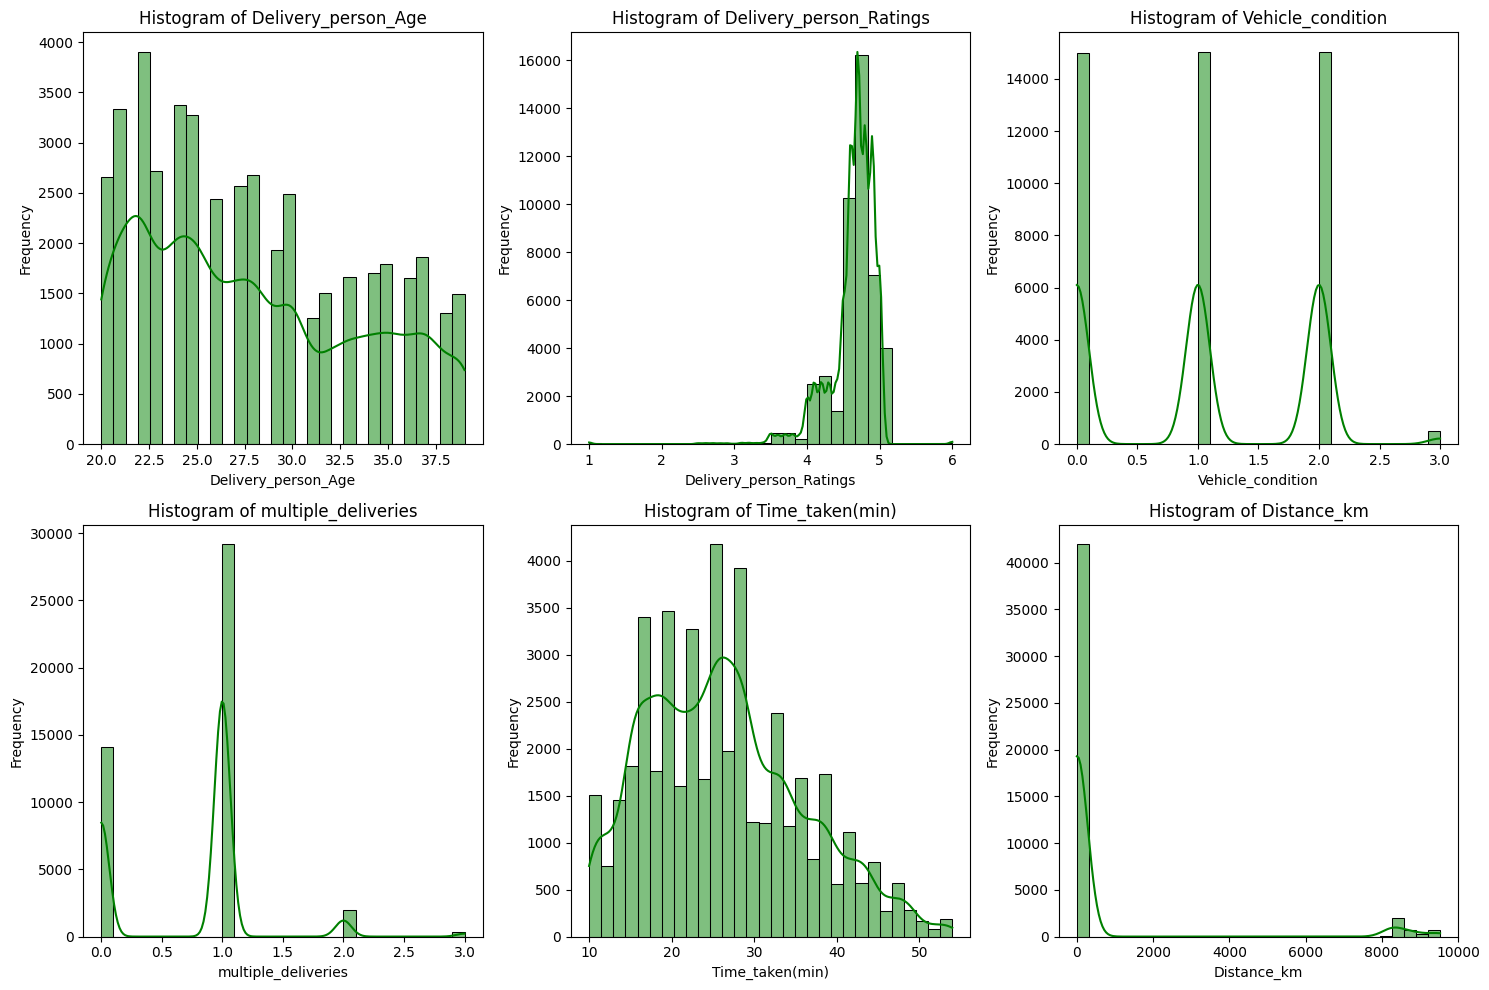

In [43]:
# Xác định số lượng cột (có thể điều chỉnh)
num_cols = 3
num_plots = len(num_list)
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

# Tạo figure với kích thước phù hợp
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Chuyển thành mảng 1D để dễ truy cập
axes = axes.flatten()

for i, col in enumerate(num_list):
    ax = axes[i]

    # Chuyển đổi thời gian sang giây nếu là 'Time_Orderd' hoặc 'Time_Order_picked'
    if col in ['Time_Orderd', 'Time_Order_picked']:
        data = df[col].dt.total_seconds()
        title = f"{col} (Seconds)"  # Thêm đơn vị giây vào tiêu đề
    else:
        data = df[col]
        title = f"Histogram of {col}"

    # Vẽ histogram với KDE
    sns.histplot(data, kde=True, bins=30, ax=ax, color="green")
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Xóa các subplot trống nếu có số lượng biểu đồ lẻ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


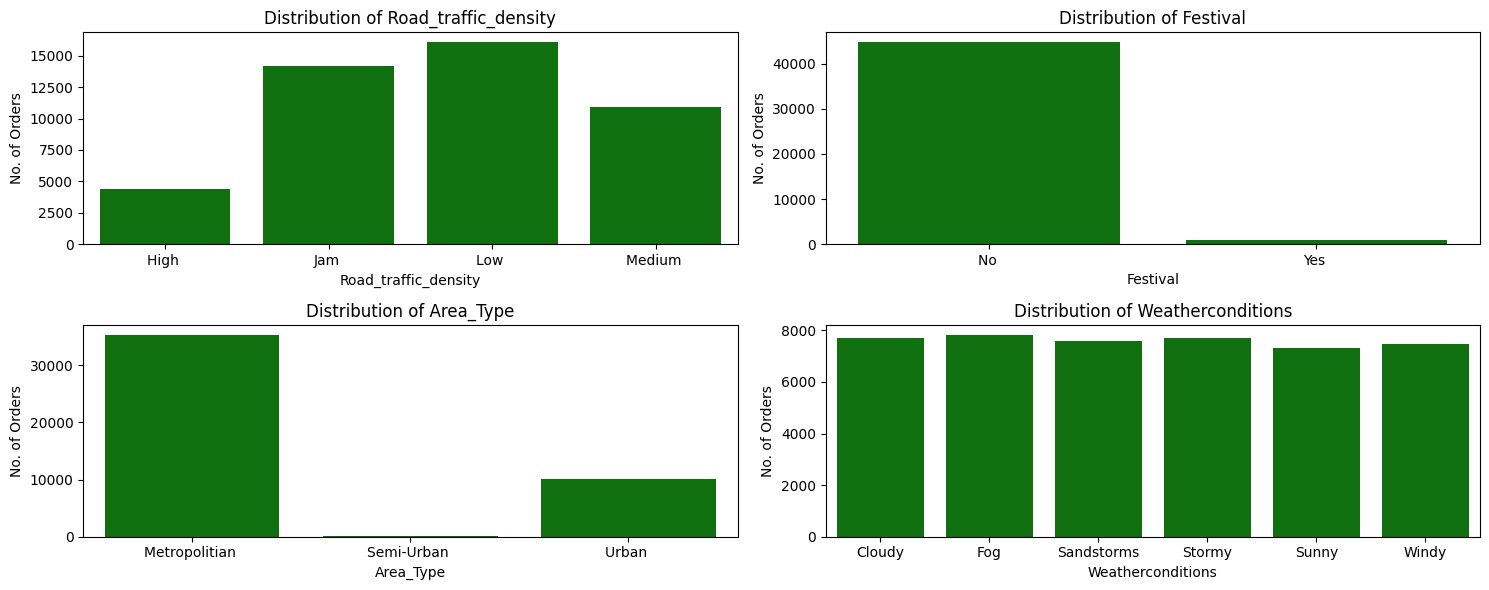

In [44]:
# Chọn các cột cần trực quan hóa
cols = ['Road_traffic_density', 'Festival', 'Area_Type', 'Weatherconditions']

# Xác định số lượng biểu đồ
num_plots = len(cols)
num_cols = 2  # Số cột trong grid layout
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

# Tạo figure và subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Chuyển thành mảng 1D để dễ truy cập nếu cần
axes = axes.flatten()

for i, column_name in enumerate(cols):
    ax = axes[i]

    # Vẽ countplot
    sns.countplot(data=df, x=column_name,
                  order=df[column_name].value_counts().sort_index().index,
                  ax=ax, color="green")

    # Tùy chỉnh nhãn và tiêu đề
    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(f"Distribution of {column_name}")
    ax.tick_params(axis='x')

# Xóa subplot trống nếu có số lượng cột lẻ
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Căn chỉnh bố cục và hiển thị
plt.tight_layout()
plt.show()


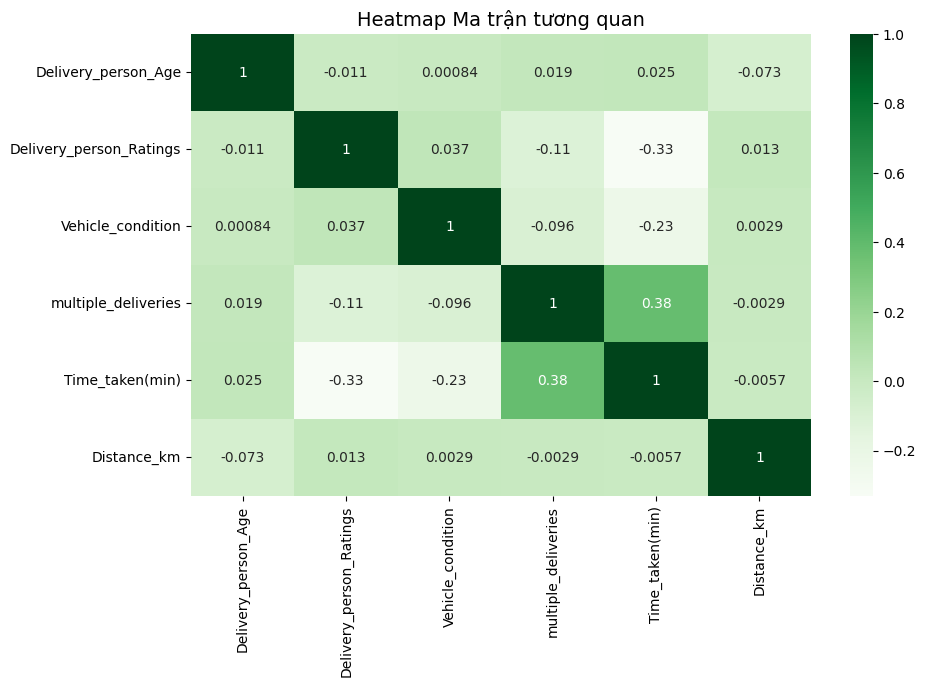

In [45]:
# Tính ma trận tương quan
corr_matrix = df[['Delivery_person_Age', 'Delivery_person_Ratings',
                        'Vehicle_condition', 'multiple_deliveries',
                        'Time_taken(min)', 'Distance_km']].dropna().corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')

plt.title("Heatmap Ma trận tương quan", fontsize=14)
plt.show()

### **Xử lý outlier**

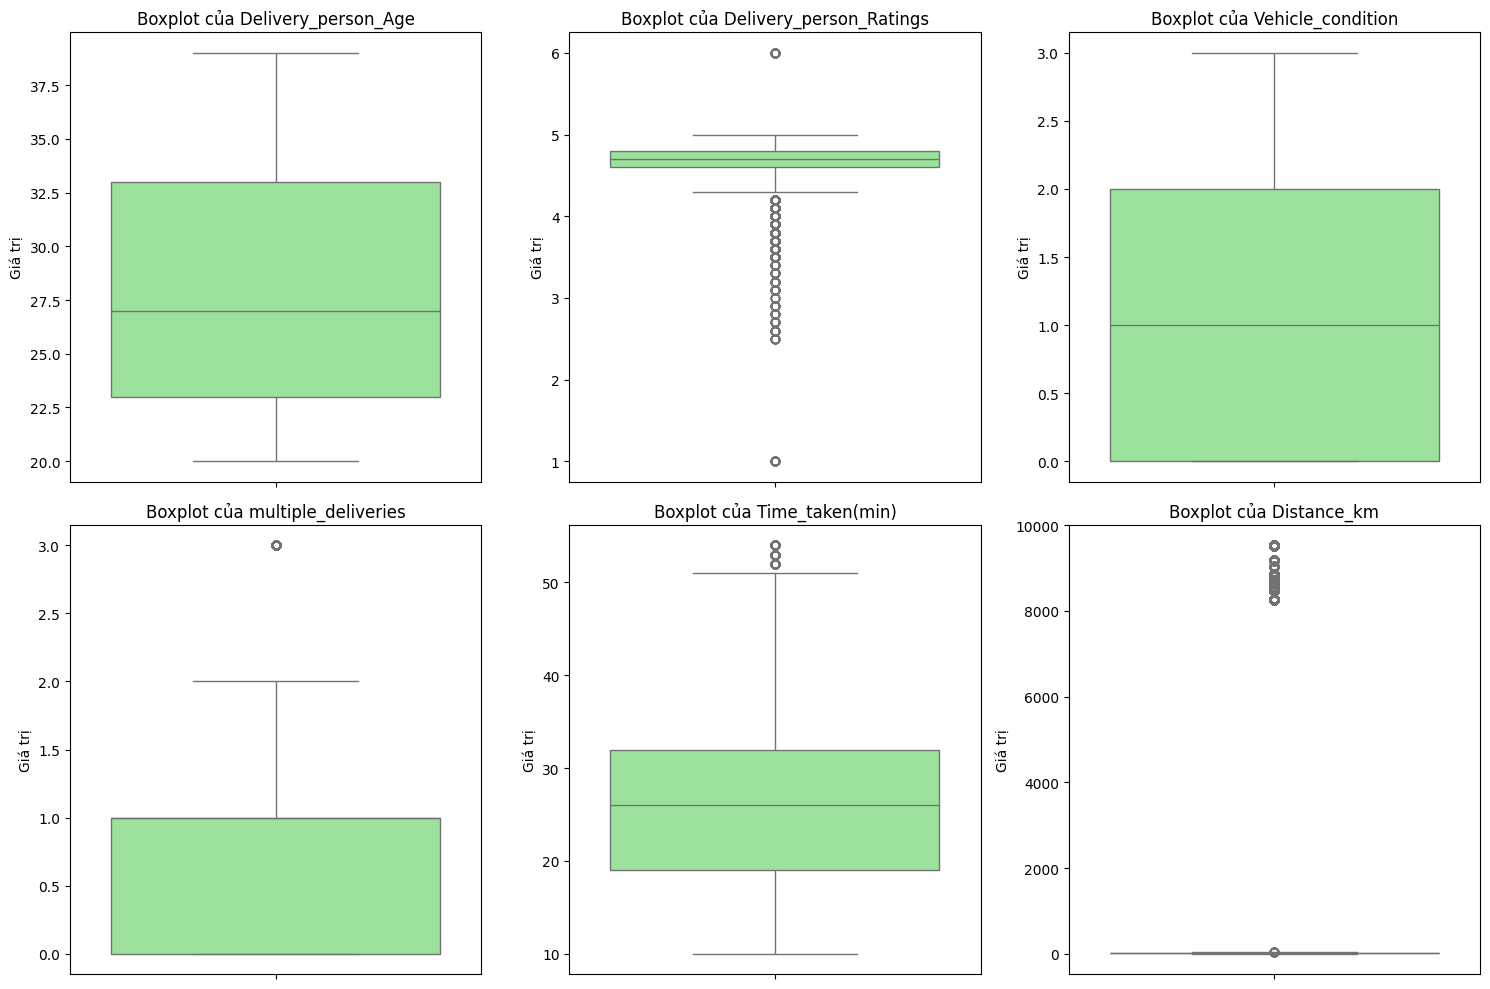

In [46]:
# Danh sách các cột cần kiểm tra ngoại lai
columns_to_check = ['Delivery_person_Age', 'Delivery_person_Ratings',
                    'Vehicle_condition', 'multiple_deliveries', 'Time_taken(min)', 'Distance_km']
# Thiết lập số lượng subplot (2 hàng, 3 cột)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Chuyển ma trận subplot thành mảng 1 chiều

# Vẽ boxplot cho từng cột
for i, col in enumerate(columns_to_check):
    sns.boxplot(y=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].set_ylabel('Giá trị', fontsize=10)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

In [47]:
# Xử lý giá trị ngoại lai cho cột Distance_km
# Tính Q1, Q3 và IQR
Q1 = df['Distance_km'].quantile(0.25)
Q3 = df['Distance_km'].quantile(0.75)

IQR = Q3 - Q1

# Xác định ranh giới dưới và trên để phát hiện ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu để loại bỏ các giá trị ngoại lai
df = df[(df['Distance_km'] >= lower_bound) & (df['Distance_km'] <= upper_bound)]


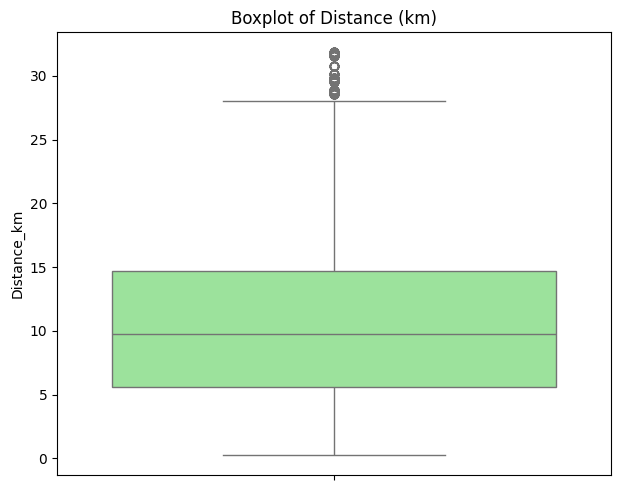

In [48]:
# Kiểm tra lại phân phối của cột Distance_km sau khi xử lý

plt.figure(figsize=(12, 5))

# Vẽ Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Distance_km"], color="lightgreen")
plt.title("Boxplot of Distance (km)")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [49]:
# Xuất file dữ liệu để thực hiện trực quan hóa
df.to_csv("delivery_time_cleaned(1).csv", index=False)

### **Feature Engineering**

**1.Tạo các cột mới**

In [50]:
# Tạo một bản sao của DataFrame
df = df.copy()

# Add new features
df['Order_Hour'] = df['Time_Ordered_formatted'].dt.hour
df['Hour_Pickup'] = df['Time_Order_picked_formatted'].dt.hour
df['Order_Prepare_Time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
df['Day_of_Week'] = df['Order_Date'].dt.dayofweek
df['Weekend'] = (df['Day_of_Week'] >= 5).astype(int)
df['month_intervals'] = np.select(
    [df['Order_Date'].dt.day <= 10, df['Order_Date'].dt.day <= 20],
    ['start_month', 'middle_month'],
    default='end_month'
)


**2. Xóa các cột không cần thiết**

In [51]:
columns_to_drop = [
    "ID", "Delivery_person_ID",
    "Order_Date", "Time_Order_picked_formatted", "Time_Ordered_formatted"
]

df= df.drop(columns=columns_to_drop)


- Giải thích: Xóa các cột được liệt kê trong columns_to_drop khỏi DataFrame, bao gồm:
  -  ID, Delivery_person_ID: Mã định danh không cần thiết cho phân tích.

  - Order_Date, Time_Order_picked_formatted, Time_Ordered_formatted: Các cột gốc đã được xử lý thành các cột mới.

Mục đích: Làm gọn DataFrame, loại bỏ dữ liệu không còn cần thiết để giảm kích thước và tập trung vào các đặc trưng quan trọng.

**3. Mã hóa biến phân loại**

In [52]:
# Danh sách các cột phân loại cần mã hóa
categorical_columns = [
    "Weatherconditions",
    "Road_traffic_density",
    "Type_of_order",
    "Type_of_vehicle",
    "Festival",
    "Area_Type",
    "City_name",
    "month_intervals"
]

# Khởi tạo dictionary để lưu các encoder
label_encoders = {}

# Thực hiện Label Encoding cho từng cột
for col in categorical_columns:
    # Khởi tạo LabelEncoder cho cột hiện tại
    le = LabelEncoder()

    # Fit và transform dữ liệu
    df[col] = le.fit_transform(df[col].astype(str))

    # Lưu encoder vào dictionary để có thể inverse_transform sau này nếu cần
    label_encoders[col] = le

    # In ra mapping của cột để kiểm tra
    print(f"\nMapping for {col}:")
    for i, label in enumerate(le.classes_):
        print(f"{label} -> {i}")


Mapping for Weatherconditions:
Cloudy -> 0
Fog -> 1
Sandstorms -> 2
Stormy -> 3
Sunny -> 4
Windy -> 5

Mapping for Road_traffic_density:
High  -> 0
Jam  -> 1
Low  -> 2
Medium  -> 3

Mapping for Type_of_order:
Buffet  -> 0
Drinks  -> 1
Meal  -> 2
Snack  -> 3

Mapping for Type_of_vehicle:
bicycle  -> 0
electric_scooter  -> 1
motorcycle  -> 2
scooter  -> 3

Mapping for Festival:
No  -> 0
Yes  -> 1

Mapping for Area_Type:
Metropolitian  -> 0
Semi-Urban  -> 1
Urban  -> 2

Mapping for City_name:
Agra -> 0
Allahabad -> 1
Aurangabad -> 2
Bangalore -> 3
Bhopal -> 4
Chennai -> 5
Coimbatore -> 6
Delhi -> 7
Goa -> 8
Hyderabad -> 9
Indore -> 10
Jaipur -> 11
Kanpur -> 12
Kochi -> 13
Kolkatta -> 14
Ludhiana -> 15
Mumbai -> 16
Mysore -> 17
Pune -> 18
Ranchi -> 19
Surat -> 20
Vadodara -> 21

Mapping for month_intervals:
end_month -> 0
middle_month -> 1
start_month -> 2


**4. Chuẩn hóa dữ liệu**

In [53]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop(columns=['Time_taken(min)'])
y = df['Time_taken(min)']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Kiểm tra kích thước của các tập dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (33520, 18)
X_test shape: (8381, 18)
y_train shape: (33520,)
y_test shape: (8381,)


In [54]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

In [55]:
# Hiển thị thông tin chi tiết về dữ liệu đã xử lý
print("\n DỮ LIỆU SAU KHI TIỀN XỬ LÝ:")
# Chuyển X_train về DataFrame để dễ quan sát
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df


 DỮ LIỆU SAU KHI TIỀN XỬ LÝ:


Delivery_person_Age  Delivery_person_Ratings  Weatherconditions  \
0                 0.529761                -1.019960          -1.457211   
1                -0.356691                -0.106587           1.476676   
2                -1.243144                -1.933332          -0.283656   
3                -0.179401                 1.111242           0.889899   
4                -1.243144                -1.628874          -0.283656   
...                    ...                      ...                ...   
33515            -1.065853                 0.197870          -1.457211   
33516             0.707051                 0.502327           0.889899   
33517            -0.711272                -1.019960          -0.870433   
33518             1.948085                -0.106587          -1.457211   
33519            -0.711272                 0.502327          -1.457211   

       Road_traffic_density  Vehicle_condition  Type_of_order  \
0                  0.281016          -0.024718       1.330347   
1                 -0.793307          -0.024718      -1.352329   
2                 -1.867630           1.167451      -1.352329   
3                 -0.793307          -0.024718       1.330347   
4                 -0.793307          -0.024718       0.436122   
...                     ...                ...            ...   
33515             -0.793307          -1.216887       0.436122   
33516             -0.793307          -0.024718       1.330347   
33517             -0.793307          -0.024718      -0.458104   
33518              0.281016          -0.024718       0.436122   
33519              0.281016          -1.216887      -0.458104   

       Type_of_vehicle  multiple_deliveries  Festival  Area_Type  City_name  \
0             1.253347             0.439006 -0.141613  -0.535813  -0.141404   
1            -0.412415             0.439006 -0.141613  -0.535813  -0.473316   
2            -0.412415             0.439006 -0.141613  -0.535813  -1.137140   
3             1.253347             0.439006 -0.141613  -0.535813   1.518156   
4             1.253347             0.439006 -0.141613  -0.535813   1.020288   
...                ...                  ...       ...        ...        ...   
33515        -0.412415             0.439006 -0.141613  -0.535813   0.522420   
33516         1.253347             0.439006 -0.141613   1.876120  -1.635008   
33517        -0.412415             0.439006 -0.141613  -0.535813   0.024552   
33518        -0.412415             0.439006 -0.141613   1.876120   1.352200   
33519        -0.412415             0.439006 -0.141613  -0.535813  -0.971184   

       Distance_km  Order_Hour  Hour_Pickup  Order_Prepare_Time  Day_of_Week  \
0         0.648204    1.160251     1.100277           -0.249753     1.526560   
1        -0.347797    0.328883     0.347805            0.201394    -1.012556   
2        -0.710732   -1.126011    -0.969021           -0.024179     1.526560   
3         1.046534    0.744567     0.724041            0.201394    -0.504733   
4         1.615080    0.744567     0.724041            0.201394     1.018737   
...            ...         ...          ...                 ...          ...   
33515     0.746672    0.328883     0.535923           -0.024179     1.018737   
33516     0.382968    0.536725     0.535923           -0.024179    -1.012556   
33517     1.750573    0.536725     0.535923           -0.024179    -1.520379   
33518    -0.412313   -3.620115    -3.226436            0.201394     0.003091   
33519     0.326315    1.160251     1.100277            0.201394     1.526560   

        Weekend  month_intervals  
0      1.622717        -0.186027  
1     -0.616250        -0.186027  
2      1.622717         1.106864  
3     -0.616250         1.106864  
4      1.622717        -1.478917  
...         ...              ...  
33515  1.622717        -0.186027  
33516 -0.616250        -0.186027  
33517 -0.616250        -0.186027  
33518 -0.616250         1.106864  
33519  1.622717        -0.186027  

[33520

### **Feature Selection**


Toàn bộ đặc trưng và mức độ ảnh hưởng:
                Feature  Importance
Delivery_person_Ratings    0.216071
    multiple_deliveries    0.131402
      Weatherconditions    0.112179
            Distance_km    0.111209
   Road_traffic_density    0.092377
      Vehicle_condition    0.071683
             Order_Hour    0.049560
              City_name    0.042414
    Delivery_person_Age    0.041514
            Day_of_Week    0.024926
               Festival    0.020807
            Hour_Pickup    0.018563
          Type_of_order    0.018467
     Order_Prepare_Time    0.015144
        month_intervals    0.013250
              Area_Type    0.009960
        Type_of_vehicle    0.007333
                Weekend    0.003140


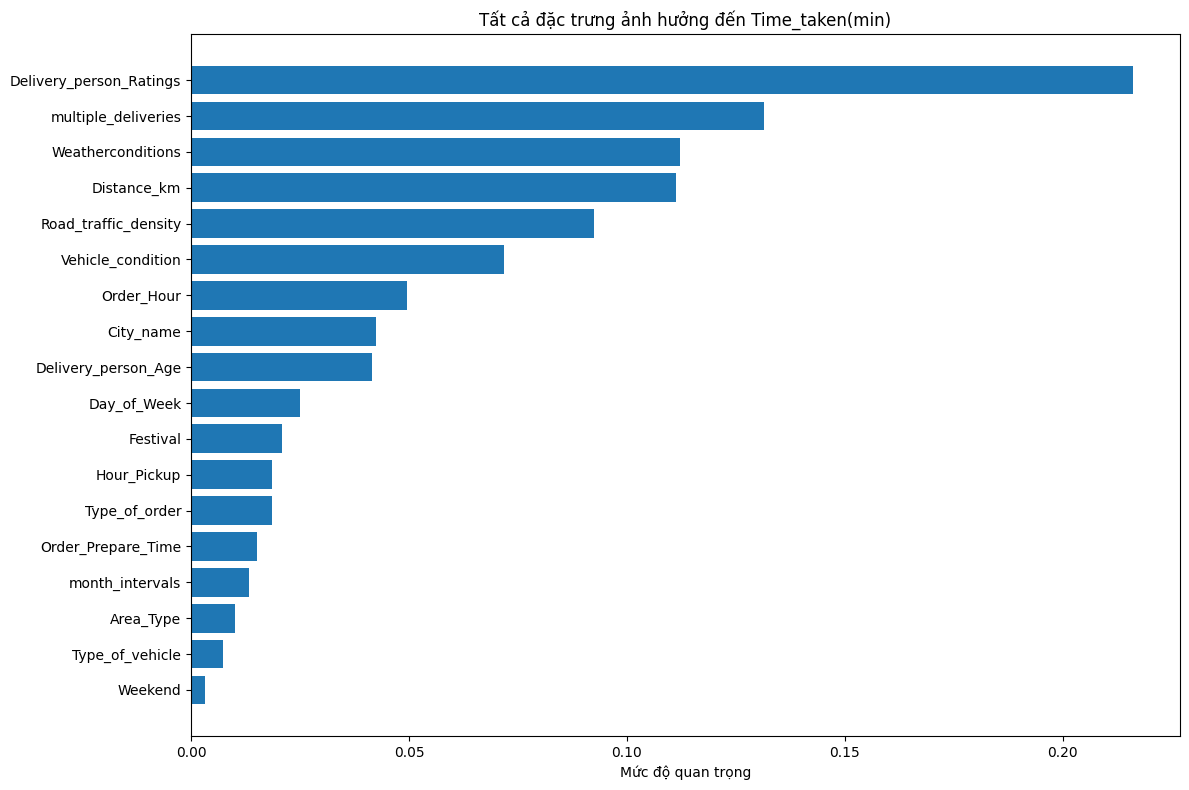

In [56]:
# 3. Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Lấy feature importances
importances = model.feature_importances_
feature_names = X.columns

# 5. Tạo DataFrame chứa kết quả
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. In toàn bộ đặc trưng và tầm quan trọng
print("\nToàn bộ đặc trưng và mức độ ảnh hưởng:")
print(feat_importance_df.to_string(index=False))

# 7. Vẽ biểu đồ thanh cho tất cả đặc trưng
plt.figure(figsize=(12, 8))
plt.barh(feat_importance_df['Feature'][::-1], feat_importance_df['Importance'][::-1])
plt.xlabel("Mức độ quan trọng")
plt.title("Tất cả đặc trưng ảnh hưởng đến Time_taken(min)")
plt.tight_layout()
plt.show()

## **III. DATA MODELING**

### **1. Linear Regression**

In [57]:
#Huấn luyện mô hình
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# Dự báo
y_pred_lin_reg=lin_reg.predict(X_test)
# Đánh giá mô hình
def evaluate_regression_model(y_test, y_pred_lin_reg, model_name="Model"):
    mse = mean_squared_error(y_test, y_pred_lin_reg)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_test, y_pred_lin_reg)
    r2 = r2_score(y_test , y_pred_lin_reg)

    print(f"\nKết quả đánh giá {model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    return mae, mse, rmse, r2

# Đánh giá kết quả
mae, mse, rmse, r2 = evaluate_regression_model(y_test, y_pred_lin_reg, "Linear Regression")



Kết quả đánh giá Linear Regression:
Mean Squared Error (MSE): 50.53
Root Mean Squared Error (RMSE): 7.11
Mean Absolute Error (MAE): 5.71
R² Score: 0.4223


### **2. Decision Tree Regressor**

In [58]:
# Khởi tạo mô hình
dt_reg = DecisionTreeRegressor(random_state=42)

#Định nghĩa bộ siêu tham số
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'absolute_error']
}

# Thiết lập GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit để tìm tham số tốt nhất
grid_search.fit(X_train, y_train)

#  Lấy ra các siêu tham số tối ưu
best_dt = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [59]:
# Dự báo với mô hình có tham số tốt nhất
y_pred_dt = best_dt.predict(X_test)
# Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu huấn luyện
best_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [60]:
# Đánh giá mô hình
def evaluate_regression_model(y_true, y_pred_dt, model_name="Model"):
    mse_dt = mean_squared_error(y_true, y_pred_dt)
    rmse_dt = np.sqrt(mse_dt)
    mae_dt = mean_absolute_error(y_true, y_pred_dt)
    r2_dt = r2_score(y_true, y_pred_dt)

    print(f"\nKết quả đánh giá {model_name}:")
    print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
    print(f"R² Score: {r2_dt:.4f}")

    return mae_dt, mse_dt, rmse_dt, r2_dt
# Đánh giá kết quả
mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_regression_model(y_test, y_pred_dt, "Decision Tree Regressor")


Kết quả đánh giá Decision Tree Regressor:
Mean Squared Error (MSE): 31.08
Root Mean Squared Error (RMSE): 5.57
Mean Absolute Error (MAE): 4.32
R² Score: 0.6447


### **3.Random Forest Regressor**

In [61]:
# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [100, 200, 300],  # Số lượng cây
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Thực hiện tìm kiếm grid
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_rf = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Bộ siêu tham số tốt nhất: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [62]:
# Dự đoán trên tập kiểm tra
y_pred_rf = best_rf.predict(X_test)
# Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu huấn luyện
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300,
                      random_state=42)

In [63]:
# Đánh giá mô hình
def evaluate_regression_model(y_test, y_pred_rf, model_name="Model"):
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print(f"\nKết quả đánh giá {model_name}:")
    print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
    print(f"R² Score: {r2_rf:.4f}")

    return mae_rf, mse_rf, rmse_rf, r2_rf
# Đánh giá kết quả
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_regression_model(y_test, y_pred_rf, "Random Forest Regressor")


Kết quả đánh giá Random Forest Regressor:
Mean Squared Error (MSE): 29.61
Root Mean Squared Error (RMSE): 5.44
Mean Absolute Error (MAE): 4.24
R² Score: 0.6614


### **4.XGBRegressor**

In [64]:
warnings.filterwarnings("ignore")
#Khởi tạo mô hình XGBoost
xg= xgb.XGBRegressor(objective='reg:squarederror', randomstate=42)

param_grid = {
    'n_estimators': [100, 200, 300],    #Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],  #Tốc độ học
    'max_depth': [3, 5, 7],             #Độ sâu tối đa của mỗi cây
    'subsample': [0.8, 1.0],            #Tỷ lệ số mẫu được chọn ngẫu nhiên cho mỗi cây
    'colsample_bytree': [0.8, 1.0],     #Tỷ lệ số đặc trưng được chọn ngẫu nhiên ở mỗi cây
}

#Khởi tạo GridSearch
Xgb_model = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
Xgb_model.fit(X_train, y_train)

#Lấy ra mô hình tốt nhất và bộ siêu tham số tối ưu
best_Xgb = Xgb_model.best_estimator_
print("Best parameters:", Xgb_model.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [65]:
warnings.filterwarnings("ignore")
# Dự đoán trên tập kiểm tra
y_pred_Xgb = best_Xgb.predict(X_test)
# Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu huấn luyện
best_Xgb.fit(X_train, y_train)
# Đánh giá mô hình
def evaluate_regression_model(y_test, y_pred_Xgb, model_name="Model"):
    mse_Xgb = mean_squared_error(y_test, y_pred_Xgb)
    rmse_Xgb = np.sqrt(mse_Xgb)
    mae_Xgb = mean_absolute_error(y_test, y_pred_Xgb)
    r2_Xgb = r2_score(y_test, y_pred_Xgb)

    print(f"\nKết quả đánh giá {model_name}:")
    print(f"Mean Squared Error (MSE): {mse_Xgb:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_Xgb:.2f}")
    print(f"Mean Absolute Error (MAE): {mae_Xgb:.2f}")
    print(f"R² Score: {r2_Xgb:.4f}")

    return mae_Xgb, mse_Xgb, rmse_Xgb, r2_Xgb
# Đánh giá kết quả
mae_Xgb, mse_Xgb, rmse_Xgb, r2_Xgb = evaluate_regression_model(y_test, y_pred_Xgb, "XGboost Regressor")


Kết quả đánh giá XGboost Regressor:
Mean Squared Error (MSE): 28.24
Root Mean Squared Error (RMSE): 5.31
Mean Absolute Error (MAE): 4.18
R² Score: 0.6771


### **So sánh kết quả**

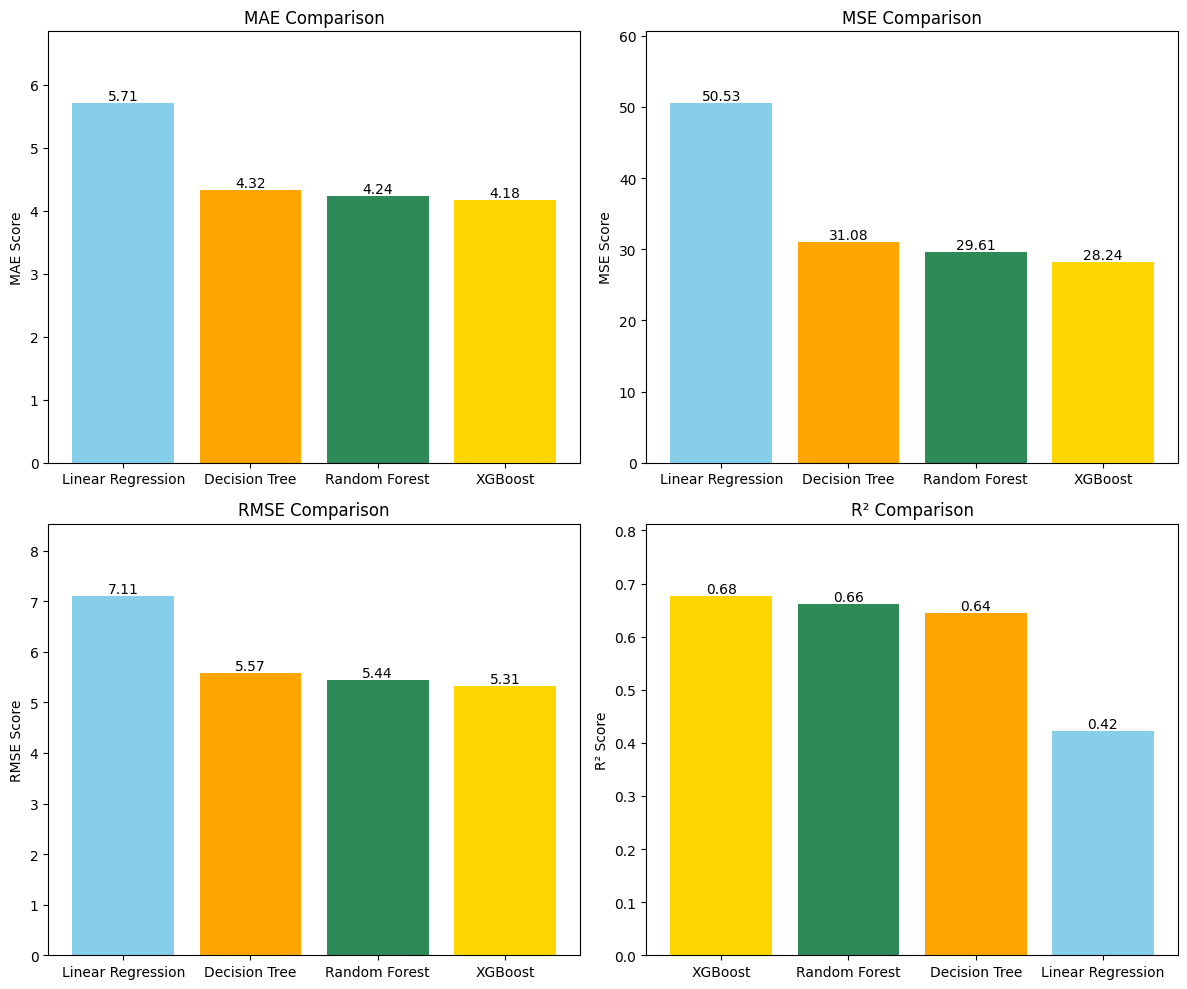

In [66]:
# Tạo hình và các subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Dữ liệu cho từng chỉ số
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']
lin_reg_scores = [mae, mse, rmse, r2]
dt_scores = [mae_dt, mse_dt, rmse_dt, r2_dt]
rf_scores = [mae_rf, mse_rf, rmse_rf, r2_rf]
xgb_scores = [mae_Xgb, mse_Xgb, rmse_Xgb, r2_Xgb]

# Duyệt qua từng chỉ số để tạo các biểu đồ riêng
for i, metric in enumerate(metrics_names):
    ax = axs[i // 2, i % 2]

    # Dữ liệu điểm số và tên mô hình
    scores = [lin_reg_scores[i], dt_scores[i], rf_scores[i], xgb_scores[i]]
    model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
    colors = ['skyblue', 'orange', 'seagreen', 'gold']

    # Sắp xếp giảm dần theo điểm số
    sorted_indices = np.argsort(scores)[::-1]
    sorted_scores = [scores[idx] for idx in sorted_indices]
    sorted_model_names = [model_names[idx] for idx in sorted_indices]
    sorted_colors = [colors[idx] for idx in sorted_indices]

    # Vẽ biểu đồ
    ax.bar(sorted_model_names, sorted_scores, color=sorted_colors)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0, max(sorted_scores) * 1.2)

    # Hiển thị giá trị trên đầu cột
    for j, score in enumerate(sorted_scores):
        ax.text(j, score, f'{score:.2f}', ha='center', va='bottom')

# Tự động điều chỉnh khoảng cách
plt.tight_layout()
plt.show()


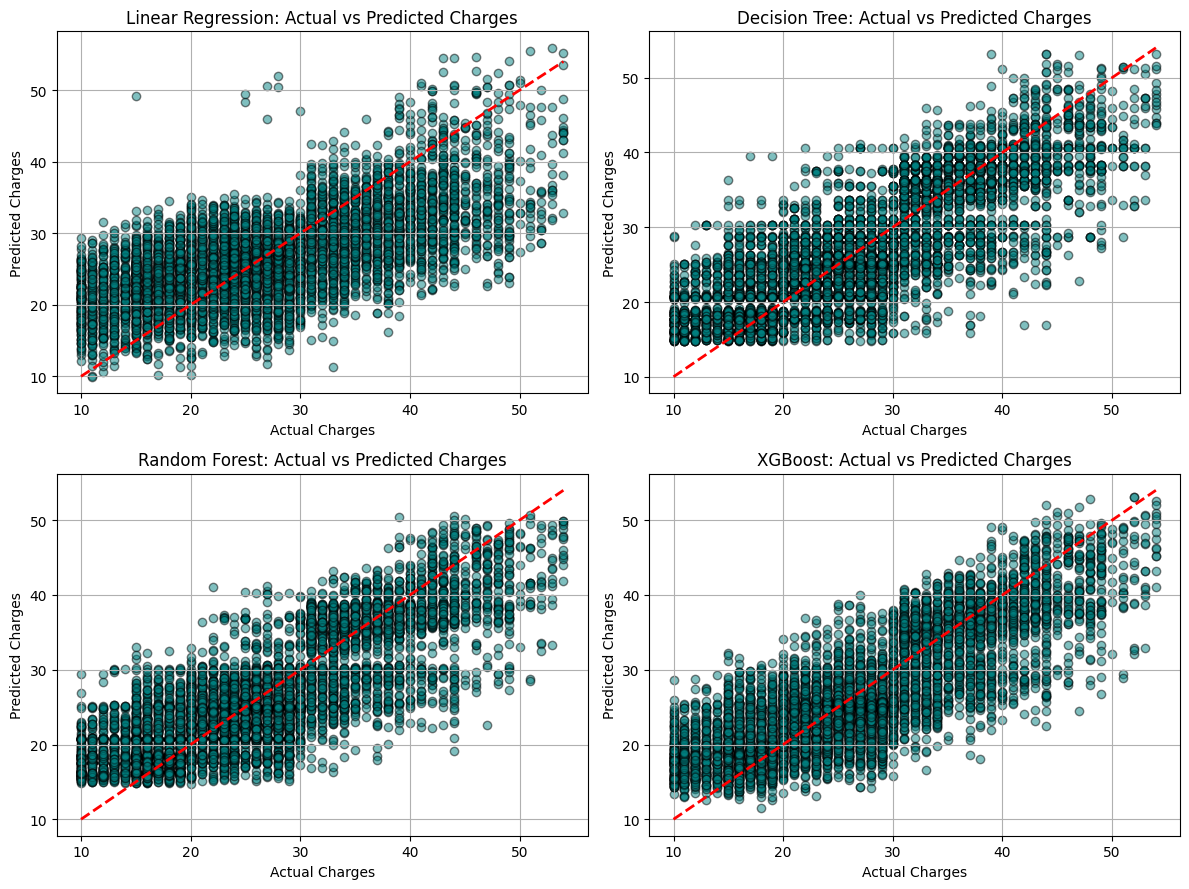

In [67]:
# Tạo hình với lưới 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# Danh sách các dự đoán và tiêu đề đúng với mô hình
predictions = [y_pred_lin_reg, y_pred_dt, y_pred_rf, y_pred_Xgb]
titles = ['Linear Regression: Actual vs Predicted Charges',
          'Decision Tree: Actual vs Predicted Charges',
          'Random Forest: Actual vs Predicted Charges',
          'XGBoost: Actual vs Predicted Charges']

# Vẽ từng biểu đồ vào subplot tương ứng
for i, ax in enumerate(axs.flat):
    ax.scatter(y_test, predictions[i], alpha=0.5, color='teal', edgecolor='k')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Charges')
    ax.set_ylabel('Predicted Charges')
    ax.set_title(titles[i])
    ax.grid(True)

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()
plt.show()


In [68]:
# 1. Tạo dữ liệu mới
new_data_dict = {
    'Delivery_person_Age': [37, 21],
    'Delivery_person_Ratings': [4.9, 4.5],
    # 'Restaurant_latitude': [12.91, 13.04],
    # 'Restaurant_longitude': [77.59, 77.67],
    # 'Delivery_location_latitude': [12.92, 13.05],
    # 'Delivery_location_longitude': [77.60, 77.68],
    'Weatherconditions': [4, 3],
    'Road_traffic_density': [0, 1],
    'Vehicle_condition': [2, 2],
    'Type_of_order': [3, 3],
    'Type_of_vehicle': [2, 3],
    'multiple_deliveries': [0, 1],
    'Festival': [0, 0],
    'Area_Type': [2, 0],
    'City_name': [10, 3],
    'Distance_km': [4.599, 19.996],
    'Order_Hour': [11, 19],
    'Hour_Pickup': [11, 19],
    'Order_Prepare_Time': [15.0, 5.0],
    'Day_of_Week': [5, 4],
    'Weekend': [1, 0],
    'month_intervals': [1, 0],
}

new_df = pd.DataFrame(new_data_dict)

# 2. Nếu dữ liệu gốc được chuẩn hóa => chuẩn hóa dữ liệu mới bằng scaler đã huấn luyện
new_df_scaled = scaler.transform(new_df)

# 3. Dự đoán bằng mô hình XGBoost đã huấn luyện
predictions = Xgb_model.predict(new_df_scaled)

# 4. Hiển thị kết quả
for i, pred in enumerate(predictions):
    print(f"Dự đoán thời gian giao hàng mẫu {i+1}: {pred:.2f} phút")


Dự đoán thời gian giao hàng mẫu 1: 15.16 phút
Dự đoán thời gian giao hàng mẫu 2: 26.41 phút


### **Lưu mô hình**

In [69]:
import pickle as pkl    
pkl.dump(scaler, open('delivery_scaler.pkl', 'wb'))
pkl.dump(Xgb_model, open('delivery_model.pkl', 'wb'))